In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
# nltk.download("stopwords")
from nlp_utils import normalize_corpus, remove_stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gc

In [2]:
df = pd.read_csv("data/adhdwomen.csv")
df.drop(["id","created_utc"], axis = 1, inplace=True)
df.head()

,title,selftext,score,url,num_comments,created_datetime
0,Adult Women Are the New Face of ADHD,NaN,3,http://www.thedailybeast.com/articles/2014/06/...,0,2014-07-01 14:07:46
1,Why Women Hide Their ADHD Symptoms,NaN,3,https://euromd.com/9-diseases-and-conditions/1...,0,2014-10-08 20:48:14
2,Adult ADHD and Burnout: Success or Failure?,NaN,1,http://rethinkadhd.wordpress.com/2014/12/23/ad...,0,2014-12-23 15:34:03
3,How Am I And My ADHD Still Alive?,NaN,2,http://blogs.psychcentral.com/adhd-man/2015/01...,0,2015-01-13 23:35:23
4,I'd like to see this subreddit grow!,"Hello, I'm a working, married, mother of 3. I...",1,https://www.reddit.com/r/adhdwomen/comments/32...,1,2015-04-11 18:43:49


## Cleaning

In [3]:
df.shape

(44384, 6)

In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(39196, 6)

In [6]:
df["score"] = df["score"].astype("int32")
df["num_comments"] = df["num_comments"].astype("int32")

In [7]:
df_title = df[["title", "score",
               "num_comments", "created_datetime"]]
df_title.head()

,title,score,num_comments,created_datetime
4,I'd like to see this subreddit grow!,1,1,2015-04-11 18:43:49
5,Duplication of historical roles is the cause o...,1,0,2015-09-05 18:01:31
6,Dealing with add,2,2,2015-10-13 21:03:24
7,Do you have a learning disability? Want to sha...,1,0,2015-11-16 01:15:35
10,When you exhaust the internet looking for vali...,3,0,2016-03-06 09:01:29


In [8]:
df_title.describe()

,score,num_comments
count,39196.000000,39196.000000
mean,20.471247,7.873584
std,70.706287,14.029083
min,0.000000,0.000000
25%,2.000000,1.000000
50%,5.000000,4.000000
75%,13.000000,9.000000
max,2156.000000,280.000000


## Data Analysis

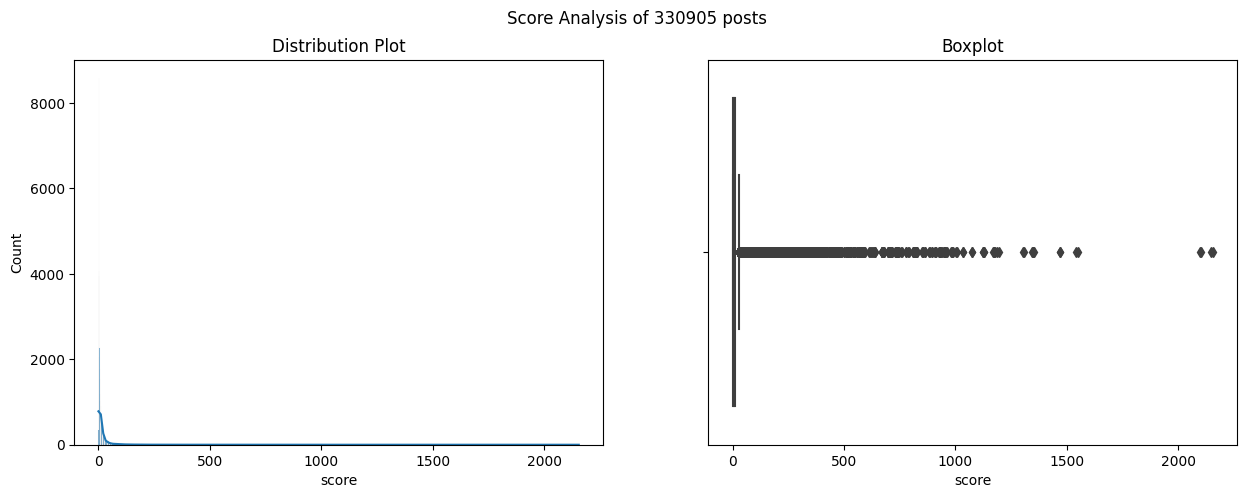

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Score Analysis of 330905 posts')

sns.histplot(ax=axes[0], x="score", data=df_title, kde=True)
axes[0].set_title("Distribution Plot")

sns.boxplot(ax=axes[1], x="score", data=df_title)
axes[1].set_title("Boxplot")

plt.show()

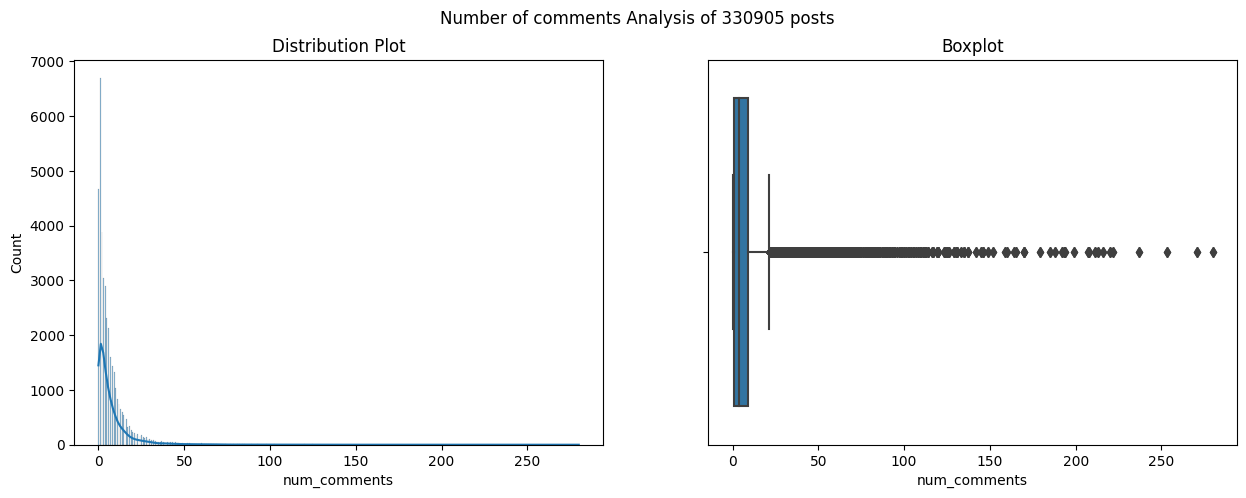

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Number of comments Analysis of 330905 posts')

sns.histplot(ax=axes[0], x="num_comments", data=df_title, kde=True)
axes[0].set_title("Distribution Plot")

sns.boxplot(ax=axes[1], x="num_comments", data=df_title)
axes[1].set_title("Boxplot")

plt.show()

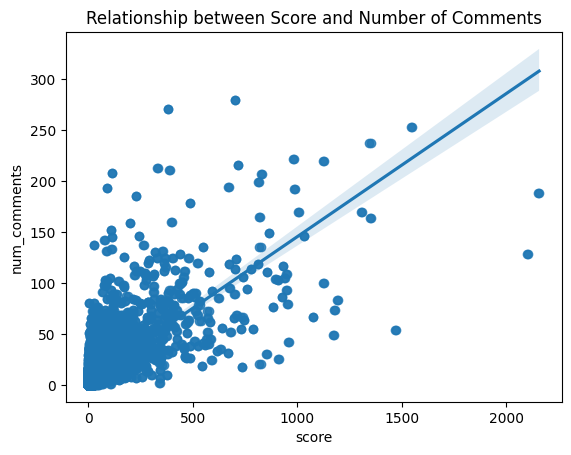

In [11]:
sns.regplot(x="score",
            y="num_comments",
            data=df)
plt.title("Relationship between Score and Number of Comments")
plt.show()

## Title Analysis

In [12]:
df_title["title"] = normalize_corpus(df_title["title"])

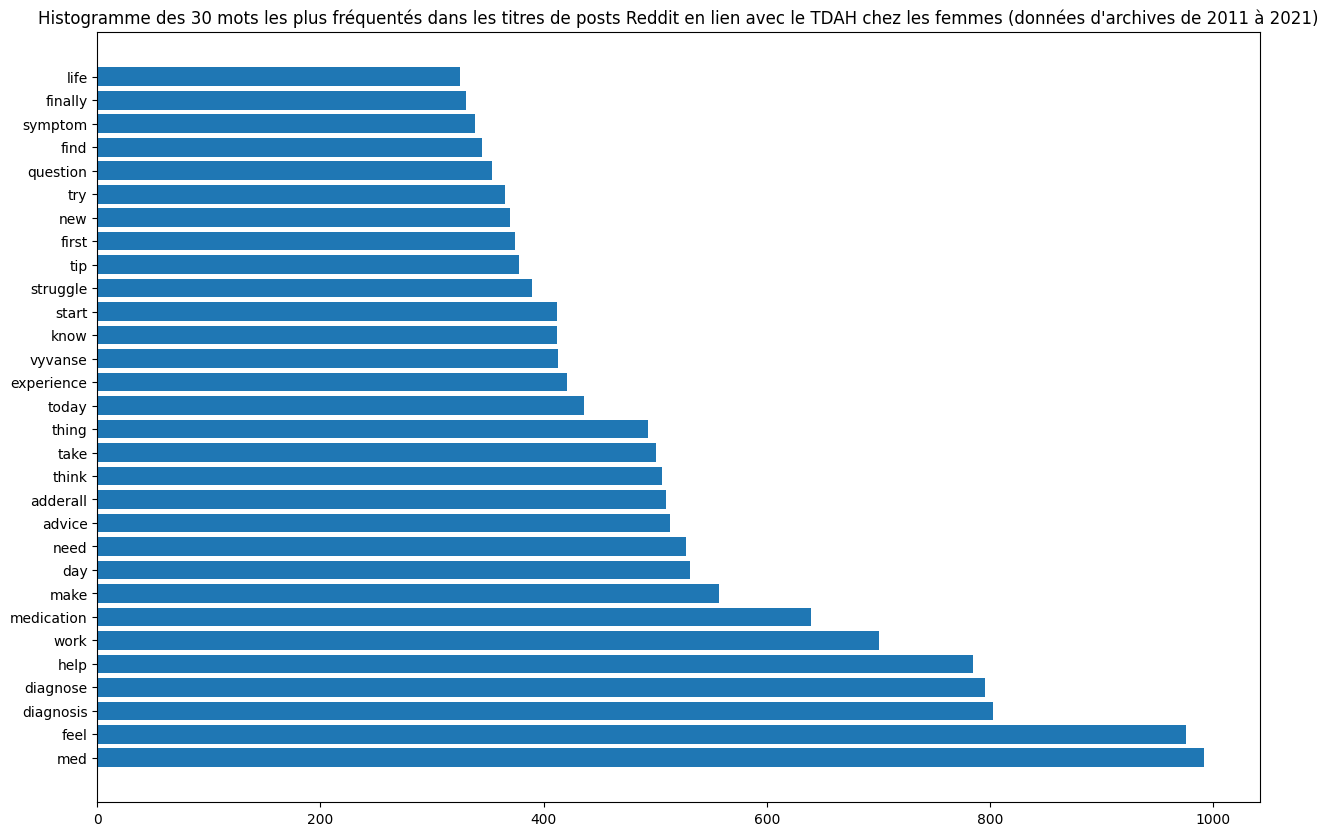

In [13]:
vectorizer_tf = TfidfVectorizer(max_features=500)
tfidf_title = vectorizer_tf.fit_transform(df_title['title']).toarray()
feature_names = vectorizer_tf.get_feature_names_out()
df_title_tf = pd.DataFrame(tfidf_title, columns=feature_names)
df_title_tf = pd.DataFrame(df_title_tf.sum(), columns=["Value"])
top_20_title_word_tf = df_title_tf.sort_values("Value",ascending=False)[:30]

plt.figure(figsize=(15,10))
plt.barh(y=top_20_title_word_tf.index, width=top_20_title_word_tf.Value)
plt.title("Histogramme des 30 mots les plus fréquentés dans les titres de posts Reddit en lien avec le TDAH chez les femmes (données d'archives de 2011 à 2021)")
plt.show()

In [14]:
del(df_title)
gc.collect()

209825

## Content Analysis

In [15]:
df_text = df[["selftext", "score", 
              "num_comments", "created_datetime"]]

In [16]:
df_text["selftext"] = normalize_corpus(df_text["selftext"])

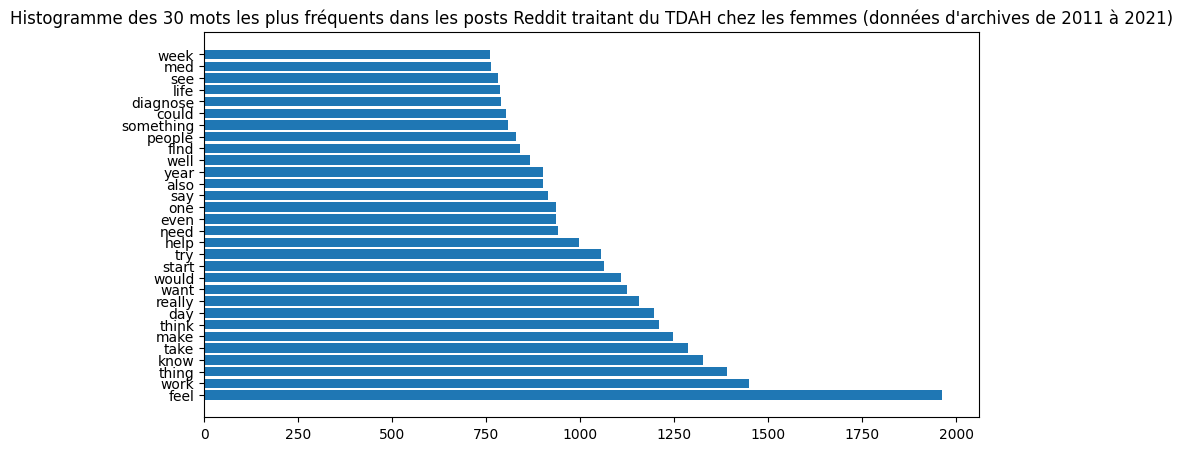

In [17]:
vectorizer_tf = TfidfVectorizer(max_features=500)
tfidf_title = vectorizer_tf.fit_transform(df_text['selftext']).toarray()
feature_names = vectorizer_tf.get_feature_names_out()
df_title_tf = pd.DataFrame(tfidf_title, columns=feature_names)
df_title_tf = pd.DataFrame(df_title_tf.sum(), columns=["Value"])
top_20_title_word_tf = df_title_tf.sort_values("Value",ascending=False)[:30]

plt.figure(figsize=(10,5))
plt.barh(y=top_20_title_word_tf.index, width=top_20_title_word_tf.Value)
plt.title("Histogramme des 30 mots les plus fréquents dans les posts Reddit traitant du TDAH chez les femmes (données d'archives de 2011 à 2021)")
plt.show()